In [2]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib.path import Path
from matplotlib.patches import PathPatch

In [3]:
def laplace(P1, i, j):
    P1[i,j] = (1/4) * (P1[i+1, j] + P1[i-1, j] + P1[i, j-1] + P1[i, j+1])

#Define an 2-D array
grid = np.zeros((6, 10))

leftBoundary = np.arange(0, 6, 1)
rigthBoundary = np.linspace(0, 5, num = 4)

#Set Boundary conditions
grid[:,0] = leftBoundary
grid[2:6,9] = rigthBoundary 
grid[5,:] = 5

Nmax = 100
N=0
while N < Nmax:
    N += 1
    for i in range(6):
        for j in range(10):
            if i > 0 and i < 5 and j > 0 and j < 9:
                if j >= 5 and i <= 2: 
                    grid[i,j] = 0
                else:
                    laplace(grid, i, j)

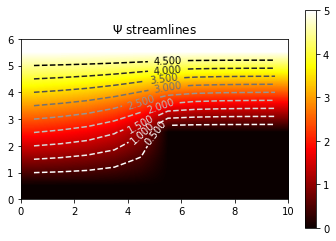

In [26]:
fig, ax = plt.subplots()
im = ax.imshow(grid, interpolation='bilinear', cmap=cm.hot, origin='lower', extent=[0, 10, 0, 6])
fig.colorbar(im)
levels = np.arange(0, 5, 0.5)
CS=ax.contour(grid, levels, cmap=cm.Greys, origin='lower', linestyles='dashed', extent=[0, 10, 0, 6])
ax.set_title("$\Psi$ streamlines")
plt.clabel(CS, inline=1, fontsize=10)
plt.show()

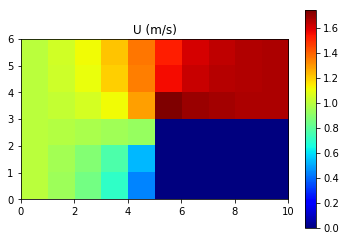

In [32]:
U = np.empty_like(grid)
for i in range(6):
    for j in range(10):
        if i > 0 and i < 5 and j >= 0 and j <= 9:
            if j >= 5 and i <= 2:
                U[i,j] = 0
            else:
                U[i, j] = (grid[i+1,j] - grid[i-1,j])/2                
U[0,:] = (grid[1,:] - 0) # just for the sake of clarity
U[5,:] = (5 -  grid[4,:])
fig, ax = plt.subplots()
im = ax.imshow(U, cmap=cm.jet, origin='lower', extent=[0, 10, 0, 6])
fig.colorbar(im)
ax.set_title("U (m/s)")
plt.show()

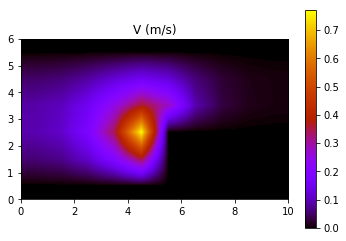

In [38]:
V = np.empty_like(grid)
for i in range(6):
    for j in range(10):
        if i >= 0 and i <= 5 and j > 0 and j < 9:
            if j >= 5 and i <= 2:
                V[i,j] = 0
            else:
                V[i,j] = (grid[i,j-1]-grid[i,j+1])/2
V[:,0] = grid[:,0] - grid[:,1]
V[:,9] = grid[:,8] - grid[:,9]
fig, ax = plt.subplots()
im = ax.imshow(V, interpolation='bilinear', cmap=cm.gnuplot, origin='lower', extent=[0, 10, 0, 6])
fig.colorbar(im)
ax.set_title("V (m/s)")
plt.show()